Assignment 1: write a program to rotate an image by a given angle (in radians) using bilinear interpolation

Start:
* load image
* set rotation angle 

In [29]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("img_example.JPG")

# Set the rotation angle
ang = np.pi/3

Problem 1: [code by yourself]

Define a function `rotate_img()`, with the following input parameters and return variables:
* img (input): input image as a 3D numpy array of size (H,W,3)
* ang (input): rotation angle in radian
* img_out (output): output image as a 3D numpy array of size (H_out,W_out,3)

This function should include the following processes:
* Define a 2x2 rotation matrix as a numpy array for the given rotation angle -> 회전 행렬 
* Compute output image size and the offset for the output image coordinates by computing the image corner coordinates after rotating the image -> 
* Apply bilinear interpolation when determining the pixel values for the output image 



In [30]:
def binterpolation(x, y, points):
    # https://stackoverflow.com/questions/8661537/how-to-perform-bilinear-interpolation-in-python 참조
    # points -> 4점의 좌표
    # x,y 는 보간할 좌표의 위치
    
    pts = sorted(points)      
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = pts
    # 좌하단      ,  좌상단,          우하단,          우상단
    
    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2: # p와 _p는 무조건 같아야함
        print('The given points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        print('The (x, y) coordinates are not within the rectangle')
    P = (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) / ((x2 - x1) * (y2 - y1) + 0.0)
    return P


#print(binterpolation(12, 4.5,[(10, 4, 100),(20, 4, 200),(10, 6, 150),(20, 6, 300)]))  

In [33]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

def rotate_img(img,angle):
    image = img           
    angle=angle
    # 회전행렬    
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])      
    H=image.shape[0]                                  
    W=image.shape[1]
                                    
    # 회전된 이미지의 폭과 너비 계산을 위해 원 이미지 좌표를 회전행렬을 통해 변환
    corners = np.array([[0, 0], [W, 0], [W, H], [0, H]])
    rotated_corners = np.dot(corners, rotation_matrix)
    '''
                        [[   0    0]
                        [ 843    0]
                        [ 843 1124]
                        [   0 1124]]
                            
                            v 
                            v
                            v
                                                                    
                        [[   0.            0.        ]
                        [ 421.5        -730.05941539]
                        [1394.91255385 -168.05941539]
                        [ 973.41255385  562.        ]]
    '''

    min_x,min_y=np.min(rotated_corners,axis=0)   # 0.0 -730.0594153902817
    max_x,max_y=np.max(rotated_corners,axis=0)   # 1394.9125538537091 562.0000000000001


    # 변환된 이미지의 폭과 너비 
    new_height = int(np.ceil(max_y - min_y))
    new_width = int(np.ceil(max_x - min_x))


    # 0으로 채워진 행렬
    output=np.zeros((new_height,new_width,image.shape[2]))

    '''

    # 1. 역변환 하기전 min_x,min_y만큼 x,y좌표를 더해주고 역변환
    # 2. 변환된 좌표가 원본 좌표 내에 들어오는 좌표면 보간
    # 3. 변환된 좌표가 원본 이미지 좌표 내에 들어오지 않는다면 0

    '''

    # 새로운 이미지가 생성될 좌표를 순회
   
    for i in range(new_height):
        for j in range(new_width):
            # 좌표값을 뺴주고
            x=j+min_x
            y=i+min_y   
            
            points=[[x,y]]
            
            # 역변환
            new_points=np.dot(points,rotation_matrix.T)       
            new_y=new_points[0][1]
            new_x=new_points[0][0]

            # 범위 내에 들어온다면 보간
            if 0 <= new_x < W-1 and 0 <= new_y < H-1:
                # print(x,y)
                # print(new_x,new_y)
                floor_x=int(np.floor(new_x))
                ceil_x=int(np.ceil(new_x))
                floor_y=int(np.floor(new_y))
                ceil_y=int(np.ceil(new_y))
                origin=[(floor_x,floor_y,image[floor_y,floor_x,:]),(floor_x,ceil_y,image[ceil_y,floor_x,:]),
                        (ceil_x,floor_y,image[floor_y,ceil_x,:]),(ceil_x,ceil_y,image[ceil_y,ceil_x,:])]
                
                P=binterpolation(new_x,new_y,origin)
                
                output[i,j,:]=P      
                    
    output=output.astype(np.uint8) 
    return output                   


Show the output:
* use matplotlib

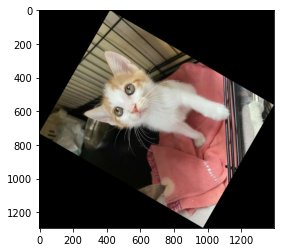

In [34]:
import matplotlib.pyplot as plt

img_out=rotate_img(img,ang)
# Convert the image from BGR to RGB format
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(img_out)
plt.show()